In [2]:
 import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string


In [4]:
data_fake=pd.read_csv("Fake.csv")
data_true=pd.read_csv('True.csv')

In [6]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [8]:
data_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [10]:
data_fake["class"]=0
data_true['class']=1

In [12]:
data_fake.shape,data_true.shape

((23481, 5), (21417, 5))

In [14]:
data_fake_manual_testing=data_fake.tail(10)
for i in range(23480,23470,-1):
    data_fake.drop([i],axis=0,inplace=True)
data_true_manual_testing=data_true.tail(10)
for i in range(21416,21406,-1):
    data_true.drop([i],axis=0,inplace=True)
    

In [16]:
data_fake.shape,data_true.shape

((23471, 5), (21407, 5))

In [18]:
data_fake_manual_testing['class']=0
data_true_manual_testing['class']=1

C:\Users\DELL\AppData\Local\Temp\ipykernel_9556\1676563180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fake_manual_testing['class']=0
C:\Users\DELL\AppData\Local\Temp\ipykernel_9556\1676563180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_true_manual_testing['class']=1


In [20]:
data_fake_manual_testing.head()

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0


In [22]:
data_true_manual_testing.head()

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1


In [24]:
data_merge=pd.concat([data_fake,data_true],axis=0)
data_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [26]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [28]:
data=data_merge.drop(['title','subject','date'],axis=1)

In [30]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [32]:
data=data.sample(frac=1)

In [34]:
data.head()

,text,class
3976,"(In April 27 story, corrects name of Republic...",1
18754,Here we go again! Another activist judge has s...,0
6518,MSNBC host Rachel Maddow found the perfect way...,0
3743,Corey Lewandowski was not prepared to be a jok...,0
5722,"During a segment of CNN s State of the Union, ...",0


In [36]:
data.reset_index(inplace=True)
data.drop(['index'],axis=1,inplace=True)

In [38]:
data.columns


Index(['text', 'class'], dtype='object')

In [40]:
data.head()

,text,class
0,"(In April 27 story, corrects name of Republic...",1
1,Here we go again! Another activist judge has s...,0
2,MSNBC host Rachel Maddow found the perfect way...,0
3,Corey Lewandowski was not prepared to be a jok...,0
4,"During a segment of CNN s State of the Union, ...",0


In [42]:
#data.drop(['level_0'],axis=1,inplace=True)

In [44]:
data.columns

Index(['text', 'class'], dtype='object')

In [46]:
data.head()

,text,class
0,"(In April 27 story, corrects name of Republic...",1
1,Here we go again! Another activist judge has s...,0
2,MSNBC host Rachel Maddow found the perfect way...,0
3,Corey Lewandowski was not prepared to be a jok...,0
4,"During a segment of CNN s State of the Union, ...",0


In [48]:
def wordopt(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text

In [50]:
data['text']=data['text'].apply(wordopt)

In [51]:
x=data['text']
y=data['class']


In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization=TfidfVectorizer()
xv_train=vectorization.fit_transform(x_train)
xv_test=vectorization.transform(x_test)

In [58]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [60]:
pred_lr=LR.predict(xv_test)

In [62]:
LR.score(xv_test,y_test)

0.9853832442067736

In [64]:
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5910
           1       0.98      0.99      0.98      5310

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [66]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(xv_train,y_train)


DecisionTreeClassifier()

In [68]:
pred_dt=DT.predict(xv_test)

In [70]:
DT.score(xv_test,y_test)

0.9968805704099821

In [72]:
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5910
           1       0.98      0.99      0.98      5310

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [76]:
from sklearn.ensemble import GradientBoostingClassifier
GB=GradientBoostingClassifier(random_state=0)
GB.fit(xv_train,y_train)


GradientBoostingClassifier(random_state=0)

In [78]:
pred_gb=GB.predict(xv_test)

In [80]:
GB.score(xv_test,y_test)

0.9966131907308378

In [82]:
print(classification_report(y_test,pred_gb))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5910
           1       0.99      1.00      1.00      5310

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [84]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(random_state=0)
RF.fit(xv_train,y_train)

RandomForestClassifier(random_state=0)

In [86]:
pred_rf=RF.predict(xv_test)

In [88]:
RF.score(xv_test,y_test)

0.9884135472370766

In [90]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5910
           1       0.99      0.99      0.99      5310

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [92]:
# Function to map predictions to labels
def output_lable(label):
    if label == 0:
        return "Fake"
    elif label == 1:
        return "Real"

# Corrected manual_testing function
def manual_testing(news):
    testing_news = {"text": [news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GB.predict(new_xv_test)
    pred_RFC = RF.predict(new_xv_test)
    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(
        output_lable(pred_LR[0]), output_lable(pred_DT[0]), output_lable(pred_GBC[0]), output_lable(pred_RFC[0])))


In [94]:
news=str(input())
manual_testing(news)

 WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a â€œfiscal conservativeâ€ on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBSâ€™ â€œFace the Nation,â€ drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense â€œdiscretionaryâ€ spending on programs that 



LR Prediction: Real 
DT Prediction: Real 
GBC Prediction: Real 
RFC Prediction: Real


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (roc_curve, auc, confusion_matrix, 
                             precision_recall_curve)

# Get predicted probabilities
y_prob_LR = LR.predict_proba(xv_test)[:, 1]
y_prob_GB = GB.predict_proba(xv_test)[:, 1]

# Get predictions
y_pred_LR = LR.predict(xv_test)
y_pred_GB = GB.predict(xv_test)

# ----------------------------
# 1. ROC Curve
# ----------------------------
fpr_LR, tpr_LR, _ = roc_curve(y_test, y_prob_LR)
roc_auc_LR = auc(fpr_LR, tpr_LR)

fpr_GB, tpr_GB, _ = roc_curve(y_test, y_prob_GB)
roc_auc_GB = auc(fpr_GB, tpr_GB)

plt.figure(figsize=(8,6))
plt.plot(fpr_LR, tpr_LR, color='blue', label=f'Logistic Regression (AUC = {roc_auc_LR:.2f})')
plt.plot(fpr_GB, tpr_GB, color='green', label=f'Gradient Boosting (AUC = {roc_auc_GB:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# ----------------------------
# 2. Precision-Recall Curve
# ----------------------------
precision_LR, recall_LR, _ = precision_recall_curve(y_test, y_prob_LR)
precision_GB, recall_GB, _ = precision_recall_curve(y_test, y_prob_GB)

plt.figure(figsize=(8,6))
plt.plot(recall_LR, precision_LR, label='Logistic Regression', color='blue')
plt.plot(recall_GB, precision_GB, label='Gradient Boosting', color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ----------------------------
# 3. Confusion Matrices
# ----------------------------
cm_LR = confusion_matrix(y_test, y_pred_LR)
cm_GB = confusion_matrix(y_test, y_pred_GB)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_LR, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(cm_GB, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Gradient Boosting Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
plt.show()

# ----------------------------
# 4. Feature Importance (Gradient Boosting)
# ----------------------------
importances = GB.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importances (Gradient Boosting)")
plt.bar(range(20), importances[indices][:20], color="green", align="center")
plt.xticks(range(20), np.array(vectorization.get_feature_names_out())[indices][:20], rotation=90)
plt.xlabel("Feature Name")
plt.ylabel("Importance Score")
plt.show()

In [ ]:
import re
import nltk
from textblob import TextBlob
from collections import Counter

# Download necessary resources
nltk.download('punkt')

# Common clickbait words
clickbait_words = {"shocking", "unbelievable", "must see", "you won’t believe", "breaking", "exposed", "incredible"}

def check_clickbait(text):
    words = set(text.lower().split())
    return any(word in words for word in clickbait_words)

def check_capitalization(text):
    capital_words = sum(1 for word in text.split() if word.isupper())
    return capital_words / len(text.split()) > 0.3  # If more than 30% words are capitalized

def check_sentiment(text):
    blob = TextBlob(text)
    return abs(blob.sentiment.polarity) > 0.8  # High polarity indicates extreme sentiment

def check_misspellings(text):
    words = text.split()
    misspelled = [word for word in words if not TextBlob(word).correct() == word]
    return len(misspelled) / len(words) > 0.1  # If more than 10% words are misspelled

def detect_fake_news(text):
    results = {
        "clickbait": check_clickbait(text),
        "capitalization": check_capitalization(text),
        "sentiment_extreme": check_sentiment(text),
        "misspellings": check_misspellings(text)
    }
    
    # If multiple red flags are detected, classify as fake
    fake_score = sum(results.values())
    
    if fake_score >= 2:
        return "Fake News 🚨", results
    else:
        return "Real News ✅", results

# Example texts
text1 = "SHOCKING!!! You Won't Believe What Happened Next!"
text2 = "Government announces new economic policies for growth."

# Testing
print(detect_fake_news(text1))
print(detect_fake_news(text2))


In [53]:
# Train Logistic Regression model
LR = LogisticRegression()
LR.fit(xv_train, y_train)

# Train Gradient Boosting Classifier
GBC = GradientBoostingClassifier()
GBC.fit(xv_train, y_train)

# Predictions using both models
pred_LR = LR.predict(xv_test)
pred_GBC = GBC.predict(xv_test)

# Combine Predictions using Weighted Averaging (Hybrid Approach)
final_preds = (pred_LR + pred_GBC) / 2  
final_preds = np.round(final_preds)  # Convert to 0 or 1

# Evaluate Model Performance
hybrid_accuracy = accuracy_score(y_test, final_preds)
print("Hybrid Model Accuracy:", hybrid_accuracy)
print("Classification Report:\n", classification_report(y_test, final_preds))


Hybrid Model Accuracy: 0.990463458110517
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      5895
           1       1.00      0.98      0.99      5325

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



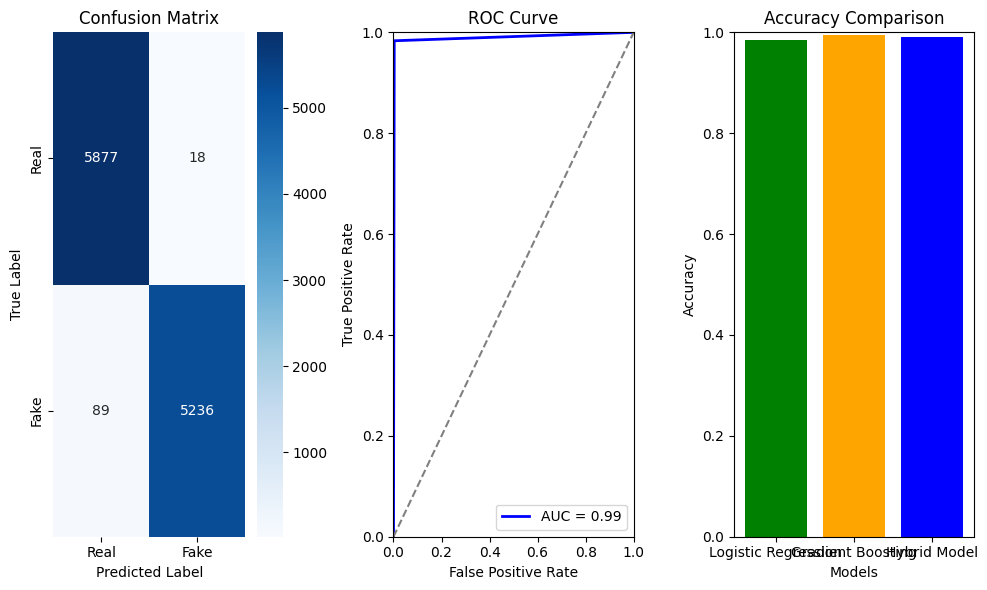

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Graph Visualization Cell
plt.figure(figsize=(10, 6))

# Compute confusion matrix
plt.subplot(1, 3, 1)
cm = confusion_matrix(y_test, final_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Compute ROC curve and AUC score
plt.subplot(1, 3, 2)
fpr, tpr, _ = roc_curve(y_test, final_preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='blue', lw=2, label='AUC = {:.2f}'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# Bar chart for accuracy comparison
plt.subplot(1, 3, 3)
models = ['Logistic Regression', 'Gradient Boosting', 'Hybrid Model']
accuracies = [accuracy_score(y_test, pred_LR), accuracy_score(y_test, pred_GBC), hybrid_accuracy]
plt.bar(models, accuracies, color=['green', 'orange', 'blue'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.title('Accuracy Comparison')

plt.tight_layout()
plt.show()

In [57]:
from sklearn.metrics import classification_report

# Generate Classification Report
report = classification_report(y_test, final_preds, target_names=["Real", "Fake"])
print(report)


              precision    recall  f1-score   support

        Real       0.99      1.00      0.99      5895
        Fake       1.00      0.98      0.99      5325

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [59]:
from sklearn.metrics import precision_score

# Calculate precision for the "Fake" class (assuming 1 represents Fake news)
precision = precision_score(y_test, final_preds, pos_label=1)
print("Precision for Fake News:", precision)


Precision for Fake News: 0.9965740388275599
